In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


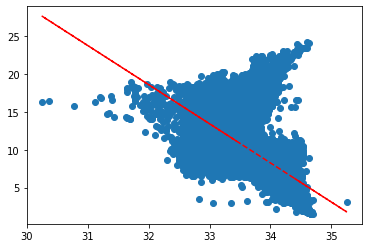

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



csv = pd.read_csv('/content/drive/MyDrive/bottle.csv')
data = csv[['T_degC', 'Salnty']]
x = data['Salnty']
y = data['T_degC']
plt.scatter(x, y)

z = np.polyfit(x, y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


UFuncTypeError: ignored

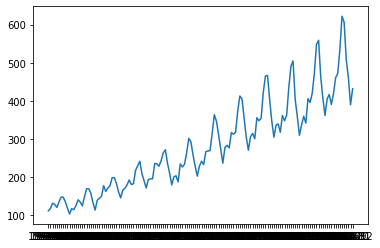

In [ ]:
csv = pd.read_csv('/content/drive/MyDrive/AirPassengers.csv')
data = csv[['Month', 'Passengers']]
x = pd.to_datetime(data['Month']).astype('datetime64[ns]')
y = data['Passengers']
plt.plot(data.Month,data.Passengers)
z = np.polyfit(x, y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [24]:
data = pd.read_csv('/content/drive/MyDrive/AirPassengers.csv')
data.head(10)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [25]:
data['Month'] = pd.to_datetime(data['Month'])
data.head(10)

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [ ]:
data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [26]:
data = data.set_index('Month')
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


KeyError: ignored

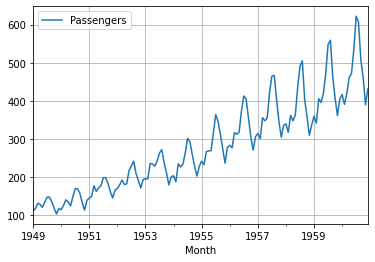

In [27]:
data.plot(grid='on')
x = data['Month']
y = data['Passengers']
plt.plot(data.Month,data.Passengers)
z = np.polyfit(x, y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

TypeError: ignored

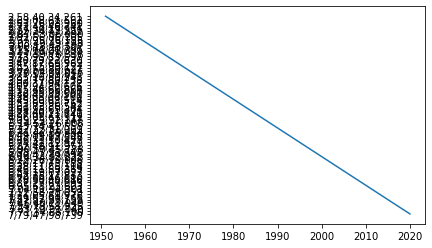

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv = pd.read_csv('/content/drive/MyDrive/Book1.csv')
data = csv[['Year', 'Total']]
x = data['Year']
y = data['Total']
plt.plot(data.Year,data.Total)
z = np.polyfit(x, y,1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

          Month  Passengers
0    1949-01-01         112
1    1949-02-01         118
2    1949-03-01         132
3    1949-04-01         129
4    1949-05-01         121
..          ...         ...
139  1960-08-01         606
140  1960-09-01         508
141  1960-10-01         461
142  1960-11-01         390
143  1960-12-01         432

[144 rows x 2 columns]


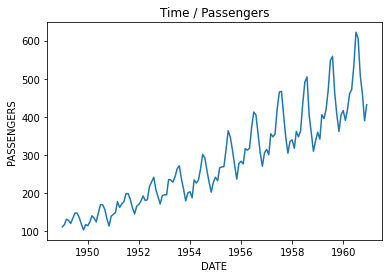

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/AirPassengers.csv')
data["Month"] = pd.to_datetime(data["Month"]).dt.date
print(data)

plt.plot(data["Month"], data["Passengers"])
plt.title("Time / Passengers")
plt.xlabel("DATE")
plt.ylabel("PASSENGERS")
plt.show()


In [40]:
data["Month1"] = data["Month"].apply(lambda x: x.toordinal())
X = data["Month1"]
#.values.reshape(-1, 1)
y = data["Passengers"]
#.values.reshape(-1, 1)

In [42]:
def OLS(X, y):
  # import pdb;pdb.set_trace()
  X_bar = np.mean(X)
  y_bar = np.mean(y)
  X_y_bar = np.mean(X * y)
  X_sq_bar = np.mean(X ** 2)
  beta_1 = (X_y_bar - X_bar * y_bar) / (X_sq_bar - X_bar ** 2) #Slope equivalent to m
  beta_0 = y_bar - beta_1 * X_bar #Intercept equivaalent to c
  return beta_0, beta_1


In [43]:
beta_0, beta_1 = OLS(X, y)
print("constant", beta_0)
print("slope", beta_1)

constant -62017.82696940321
slope 0.08729284120137898


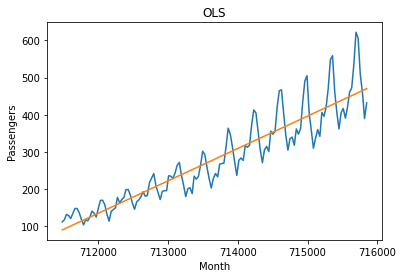

In [46]:
plt.plot(data["Month1"], data["Passengers"])
plt.plot(data["Month1"], beta_0 + beta_1 * data["Month1"])
plt.title("OLS")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.show()